# Project 1

## Predict whether a mammogram mass is benign or malignant

We'll be using the "mammographic masses" public dataset.

This data contains 961 instances of masses detected in mammograms, and contains the following attributes:


   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)
   
BI-RADS is an assesment of how confident the severity classification is; it is not a "predictive" attribute and so we will discard it. The age, shape, margin, and density attributes are the features that we will build our model with, and "severity" is the classification we will attempt to predict based on those attributes.

Although "shape" and "margin" are nominal data types, which sklearn typically doesn't deal with well, they are close enough to ordinal that we shouldn't just discard them. The "shape" for example is ordered increasingly from round to irregular.

A lot of unnecessary anguish and surgery arises from false positives arising from mammogram results. 

Build a better way to interpret them through supervised machine learning.

## Your assignment

Apply Artificial Neural Network supervised machine learning techniques to this data set and validate it by applying K-Fold cross validation (K=10).

The data needs to be cleaned; many rows contain missing data, and there may be erroneous data identifiable as outliers as well.

Many optimization techniques provide the means of "hyperparameters" to be tuned (e.g. Genetic Algorithms). Once you identify a promising approach, see if you can make it even better by tuning its hyperparameters.

Below it's described the set of steps that outline the development of this project, with some guidance and hints. If you're up for a real challenge, try doing this project from scratch in a new, clean notebook!


## Let's begin: prepare your data

Start by importing the mammographic_masses.data.txt file into a Pandas dataframe (hint: use read_csv) and take a look at it.

In [0]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/mammographic_masses.data.txt', na_values='?')
data.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


,5,67,3,5.1,3.1,1
0,4.0,43.0,1.0,1.0,NaN,1
1,5.0,58.0,4.0,5.0,3.0,1
2,4.0,28.0,1.0,1.0,3.0,0
3,5.0,74.0,1.0,5.0,NaN,1
4,4.0,65.0,1.0,NaN,3.0,0


Make sure you use the optional parmaters in read_csv to convert missing data (indicated by a ?) into NaN, and to add the appropriate column names (BI_RADS, age, shape, margin, density, and severity):

In [0]:
data.columns = ['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity']
data = data.drop(['BI-RADS'], axis=1)
data.head()

,Age,Shape,Margin,Density,Severity
0,43.0,1.0,1.0,NaN,1
1,58.0,4.0,5.0,3.0,1
2,28.0,1.0,1.0,3.0,0
3,74.0,1.0,5.0,NaN,1
4,65.0,1.0,NaN,3.0,0


Evaluate whether the data needs cleaning; your model is only as good as the data it's given. Hint: use describe() on the dataframe.

In [0]:
#print(data.isna().sum())
#print(data.describe())
print(data['Severity'].value_counts())

0    516
1    444
Name: Severity, dtype: int64


There are quite a few missing values in the data set. Before we just drop every row that's missing data, let's make sure we don't bias our data in doing so.

In [0]:
missing_values = data.loc[(data['Age'].isnull()) |
              (data['Shape'].isnull()) |
              (data['Margin'].isnull()) |
              (data['Density'].isnull())]

In [0]:
print(missing_values.describe())

              Age      Shape     Margin    Density    Severity
count  125.000000  99.000000  82.000000  54.000000  130.000000
mean    53.560000   2.202020   2.609756   2.833333    0.323077
std     13.087423   1.124675   1.561545   0.693637    0.469461
min     23.000000   1.000000   1.000000   1.000000    0.000000
25%     43.000000   1.000000   1.000000   3.000000    0.000000
50%     55.000000   2.000000   3.000000   3.000000    0.000000
75%     63.000000   3.000000   4.000000   3.000000    1.000000
max     82.000000   4.000000   5.000000   4.000000    1.000000


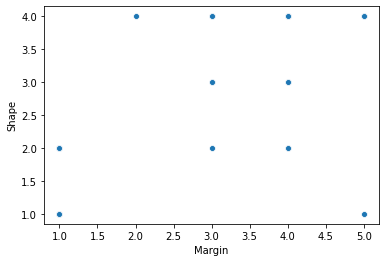

In [0]:
sb.scatterplot(x='Margin',y='Shape', data=missing_values)

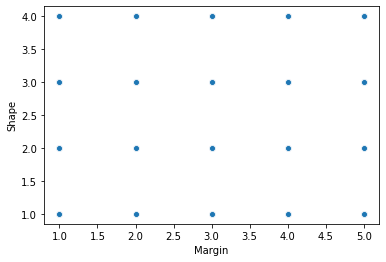

In [0]:
sb.scatterplot(x='Margin',y='Shape', data=data)

In [0]:
tmp = data
tmp['Density'] = tmp['Density'].replace(np.nan, 5)
tmp['Margin'] = tmp['Margin'].replace(np.nan, 6)
tmp['Shape'] = tmp['Shape'].replace(np.nan, 5)
tmp['Age'] = tmp['Age'].replace(np.nan, 100)

print(tmp)

plt.figure(figsize=(16, 6))
#sb.distplot(data['Density'],bins=30)
#sb.scatterplot(x='Shape',y='Density', hue='Severity', data=tmp)

      Age  Shape  Margin  Density  Severity
0    43.0    1.0     1.0      5.0         1
1    58.0    4.0     5.0      3.0         1
2    28.0    1.0     1.0      3.0         0
3    74.0    1.0     5.0      5.0         1
4    65.0    1.0     6.0      3.0         0
..    ...    ...     ...      ...       ...
955  47.0    2.0     1.0      3.0         0
956  56.0    4.0     5.0      3.0         1
957  64.0    4.0     5.0      3.0         0
958  66.0    4.0     5.0      3.0         1
959  62.0    3.0     3.0      3.0         0

[960 rows x 5 columns]


<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

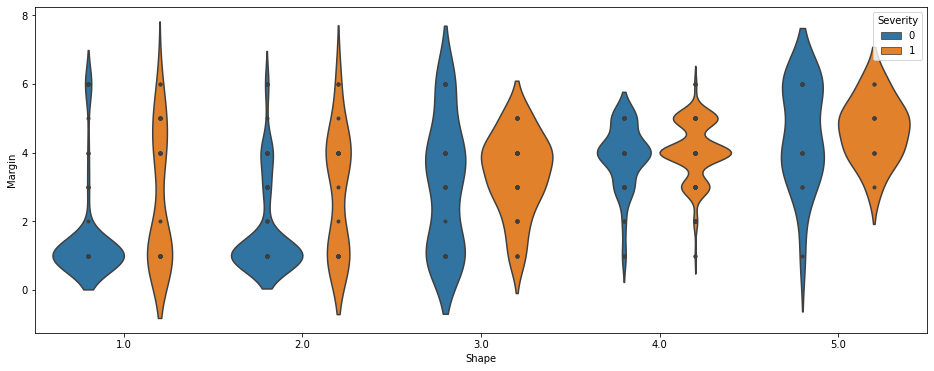

In [0]:
plt.figure(figsize=(16, 6))
sb.violinplot(x='Shape',y='Margin',data=tmp, hue='Severity', inner='point')

# tmp[tmp['Shape'] == 4][tmp['Margin'] == 1].info()

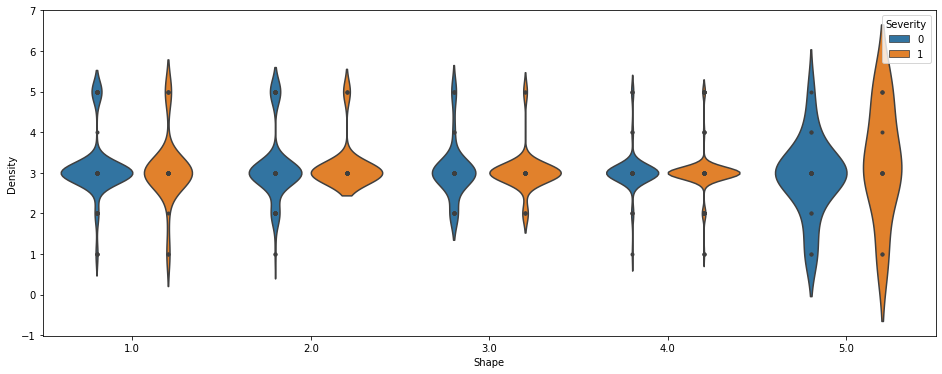

In [0]:
plt.figure(figsize=(16, 6))
sb.violinplot(x='Shape',y='Density',data=tmp, hue='Severity', inner='point')

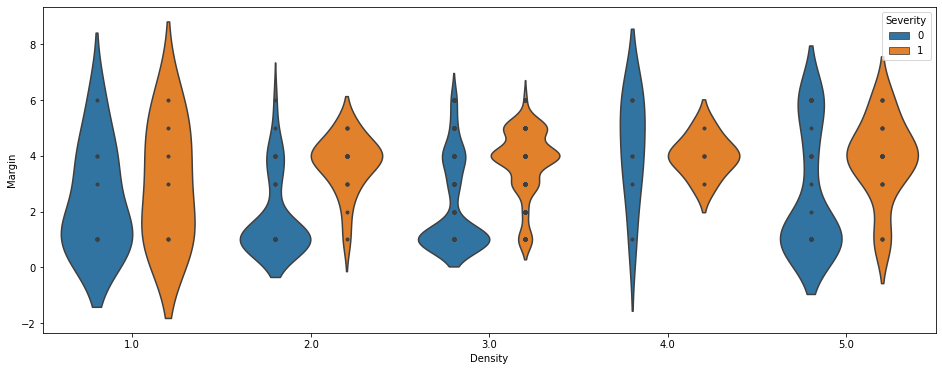

In [0]:
plt.figure(figsize=(16, 6))
sb.violinplot(x='Density',y='Margin',data=tmp, hue='Severity', inner='point')

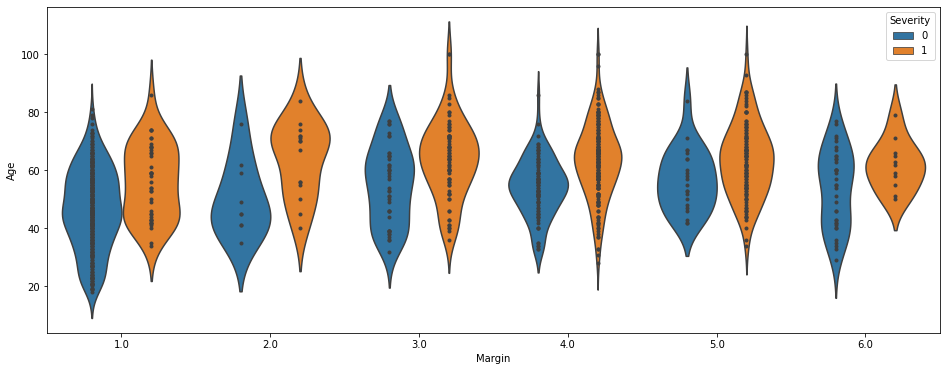

In [0]:
plt.figure(figsize=(16, 6))
sb.violinplot(x='Margin',y='Age',data=tmp, hue='Severity', inner='point')

In [0]:
data_no_age = data.drop(data.index[data['Age'] == 100])
data_no_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955 entries, 0 to 959
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       955 non-null    float64
 1   Shape     955 non-null    float64
 2   Margin    955 non-null    float64
 3   Density   955 non-null    float64
 4   Severity  955 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 44.8 KB


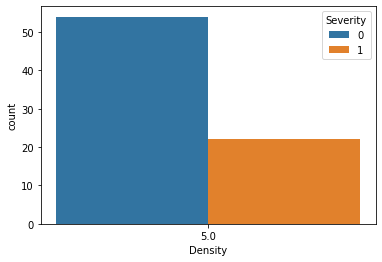

In [0]:
sb.countplot(x='Density',data=tmp[tmp['Density'] == 5], hue='Severity')

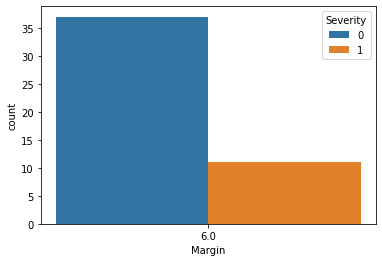

In [0]:
sb.countplot(x='Margin',data=tmp[tmp['Margin'] == 6], hue='Severity')

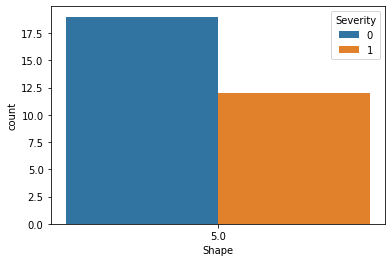

In [0]:
sb.countplot(x='Shape',data=tmp[tmp['Shape'] == 5], hue='Severity')

If the missing data seems randomly distributed, go ahead and drop rows with missing data. Hint: use dropna().

In [0]:
data = data.dropna()
print(data.describe())
print(data.info())
print(data['Severity'].value_counts())

              Age       Shape      Margin     Density    Severity
count  960.000000  960.000000  960.000000  960.000000  960.000000
mean    55.707292    2.794792    2.954167    3.076042    0.462500
std     14.796737    1.287857    1.678541    0.672295    0.498852
min     18.000000    1.000000    1.000000    1.000000    0.000000
25%     45.000000    2.000000    1.000000    3.000000    0.000000
50%     57.000000    3.000000    3.000000    3.000000    0.000000
75%     66.000000    4.000000    4.000000    3.000000    1.000000
max    100.000000    5.000000    6.000000    5.000000    1.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       960 non-null    float64
 1   Shape     960 non-null    float64
 2   Margin    960 non-null    float64
 3   Density   960 non-null    float64
 4   Severity  960 non-null    int64  
dtypes: float64(4), int64(1)


Next you'll need to convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. Create an array that extracts only the feature data we want to work with (age, shape, margin, and density) and another array that contains the classes (severity). You'll also need an array of the feature name labels.

In [0]:
data_x = data.drop(['Severity'], axis=1).to_numpy()
print(data_x)
data_y = data['Severity'].to_numpy()
print(data_y)
feature_names = np.array(data.drop(['Severity'], axis=1).columns)
print(feature_names)

[[43.  1.  1.  5.]
 [58.  4.  5.  3.]
 [28.  1.  1.  3.]
 ...
 [64.  4.  5.  3.]
 [66.  4.  5.  3.]
 [62.  3.  3.  3.]]
[1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1
 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1
 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1
 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1
 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0
 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1
 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1
 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0
 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 

Some of our models require the input data to be normalized, so go ahead and normalize the attribute data. Hint: use preprocessing.StandardScaler().

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_x_normalized = scaler.fit_transform(data_x)
print(data_x_normalized)

[[-0.85923776 -1.39435297 -1.16481213  2.86326996]
 [ 0.15502765  0.93631247  1.2194515  -0.1131666 ]
 [-1.87350316 -1.39435297 -1.16481213 -0.1131666 ]
 ...
 [ 0.56073381  0.93631247  1.2194515  -0.1131666 ]
 [ 0.6959692   0.93631247  1.2194515  -0.1131666 ]
 [ 0.42549843  0.15942399  0.02731969 -0.1131666 ]]


## Neural Networks

You can use Tensorflow to set up a neural network with 1 binary output neuron and see how it performs. Don't be afraid to run a large number of epochs to train the model if necessary. As a bonus, try to optimize this model's hyperparameters using GA.

### GA

In [0]:
import numpy as np
import random

np.random.seed(15) #So we can reproduce results

In [0]:
class Individual:
    ids = 0
    def __init__(self, n_layers, n_nodes, n_batch_size, activation_function, gen, optimizer, loss):
        self.id = Individual.ids
        Individual.ids += 1
        self.n_layers = n_layers
        self.n_nodes = n_nodes
        self.n_batch_size = n_batch_size
        self.activation_function = activation_function
        self.FP = -1
        self.FN = -1
        self.ACC = -1
        self.gen = gen
        self.fitness = -1
        self.optimizer = optimizer
        self.loss = loss
    
    def calculate_fitness(self): ## Maybe change the proportions MAX -> 70 | Ideal ~ 65-66
      self.fitness = 0.7 * self.ACC - (0.2 * self.FN) - (0.1 * self.FP)


    def print_details(self, file=None):
        print("---------------------------------------", file=file)
        print("Generation ", self.gen, " ID ", self.id, file=file)
        print("Fitness Score: ", self.fitness, file=file)
        print("Layers: ", self.n_layers, file=file)
        print("Nodes: ", self.n_nodes, file=file)
        print("Batch Size: ", self.n_batch_size, file=file)
        print("Activation_Function: ", self.activation_function, file=file)
        print("Optimizer: ", self.optimizer, file=file)
        print("Losse Function: ", self.loss, file=file)
        print("FP: ", self.FP, " | FN: ", self.FN, " | ACC: ", self.ACC, file=file)
        print("---------------------------------------", file=file)

In [0]:
import itertools
import numpy as np

ACTIVATIONS   = ['elu','relu','tanh']
OPTIMIZERS    = ['adam','sgd','adagrad','adadelta','rmsprop']
LOSSES        = ['binary_crossentropy']
EPOCHS        = [200,250,300,350,400,450,500]
BATCH_SIZE    = [32,64,128]
NEURONS       = [8,16,32,64]
N_LAYERS      = [1,2,3,4,5,6,7]

class GA:
  total_generations = 0
  def __init__(self, pop_size=15, iterations=20):
    self.POP_SIZE = pop_size
    self.best_of_each = []
    self.pop = []
    self.iterations = iterations
    GA.total_generations = 0
  
  def initialize(self):
    for i in range(self.POP_SIZE):
      n_layers = random.choice(N_LAYERS)
      n_nodes = random.choice(NEURONS)
      activation_function = random.choice(ACTIVATIONS)
      batch_size = random.choice(BATCH_SIZE)
      optimizer = random.choice(OPTIMIZERS)
      loss = LOSSES[0]  #random.choice(LOSSES)
      ind = Individual(n_layers, n_nodes, batch_size, activation_function, GA.total_generations, optimizer, loss)
      self.pop.append(ind)
  
  def selection(self):    # Stochastic universal sampling
    parents = []
    ### ALGORITHM to choose ONLY 6
    F = sum([i.fitness for i in self.pop])
    N = 6
    P = F / N
    start = random.random()
    pointers = [start + i*P for i in range(N)]

    for p in pointers:
      i = 0
      fitness_sum = self.pop[i].fitness
      while fitness_sum < P:
        i += 1
        fitness_sum += self.pop[i].fitness
      parents.append(self.pop[i])

    return parents

  def _selection_aux(self, n):
    return n.fitness

  def selection_top(self):
    parents = []
    self.pop.sort(key=self._selection_aux, reverse=True)
    parents = self.pop[:6]
    
    return parents

  def crossover(self,parents):
    GA.total_generations += 1
    tmp = []
    for p1,p2 in itertools.combinations(parents,2):   # Uniform crossover
      breed = Individual(0,0,0,'',GA.total_generations, '','')
      for i in range(5):
        p = random.random()
        if p > 0.5:
          ind = p1
        else:
          ind = p2

        if i == 0:
          breed.n_layers = ind.n_layers
        elif i == 1:
          breed.n_nodes = ind.n_nodes
        elif i == 2:
          breed.n_batch_size = ind.n_batch_size
        elif i == 3:
          breed.activation_function = ind.activation_function
        elif i == 4:
          breed.optimizer = ind.optimizer

        breed.loss = LOSSES[0]

      breed = self.mutation(breed)
      tmp.append(breed)
    self.pop = tmp
  
  def mutation(self,ind):
    p = random.random()
    if p <= 0.2:
      print("Mutated!")
      g = random.choice(range(0,5)) ## Can be changed in the future
      if g == 0:
        t = N_LAYERS[:]
        t.remove(ind.n_layers)
        ind.n_layers = random.choice(t)
      elif g == 1:
        t = NEURONS[:]
        t.remove(ind.n_nodes)
        ind.n_nodes = random.choice(t)
      elif g == 2:
        t = BATCH_SIZE[:]
        t.remove(ind.n_batch_size)
        ind.n_batch_size = random.choice(t)
      elif g == 3:
        t = ACTIVATIONS[:]
        t.remove(ind.activation_function)
        ind.activation_function = random.choice(t)
      elif g == 4:
        t = OPTIMIZERS[:]
        t.remove(ind.optimizer)
        ind.optimizer = random.choice(t)
    return ind

  def condition_to_end(self,generations):
    flag1 = False
    flag2 = False
    flag3 = False
    # Existing False Positives?
    for i in self.pop:
      if i.FP > 0.15:
        print("There are still FP!")
        break
      else:
        flag1 = True
        break
        # PLease see again

    # Fitness Stagneted? 
    fitns = []
    for g in generations[-5:]:
      mean_fitnesses = 0
      for i in g:
        mean_fitnesses += i.fitness
      fitns.append(mean_fitnesses)
    if np.std(fitns) > 3:
      flag2 = True
      print("Fitness still not converged, deviation at ", np.std(fitns))
  
    if GA.total_generations > self.iterations-1:
      flag3 = True

    return flag3
  

In [0]:
import matplotlib.pyplot as plt

def map_aux(n):
  return n.fitness

def map_aux2(n):
  return n.FN

def map_aux3(n):
  return n.ACC

every_gen = []
best_of_each = []

def run_otimization():
  Individual.ids = 0
  global every_gen, best_of_each
  every_gen = []
  best_of_each = []

  ga = GA(iterations=30)
  ga.initialize()
  while not ga.condition_to_end(every_gen):
    print("Generation ", GA.total_generations, "!")
    every_gen.append(ga.pop)
    for i in ga.pop:
      print("--- Individual ", i.id)
      fp, fn, sc = run_neural_network(i)
      i.FN = fn
      i.FP = fp
      i.ACC = sc
      i.calculate_fitness()
      print("- Fitness ", i.fitness)
      with open('/content/drive/My Drive/individuals.txt','a') as f:
        i.print_details(file=f)
    best_of_each.append(sorted(ga.pop,key=lambda x: x.fitness, reverse=True)[0])
    parents = ga.selection_top()
    ga.crossover(parents)

  # Writing Results
  with open('/content/drive/My Drive/results.txt', 'w') as f:
    for i in best_of_each:
      i.print_details(file=f)
  
  with open('/content/drive/My Drive/results_ordered.txt', 'w') as f:
    tmp = best_of_each[:]
    tmp.sort(reverse=True, key=map_aux)
    for i in tmp:
      i.print_details(file=f)

  drive.flush_and_unmount()
  ## Analysing performance
  fitnesses = [np.mean(list(map(map_aux,g))) for g in every_gen]
  plt.figure()
  plt.plot(range(GA.total_generations), fitnesses, label="Mean fitness of each generation")
  plt.plot(range(GA.total_generations), list(map(map_aux,best_of_each)), label="Best Fitness of each generation")
  plt.ylabel("Fitness Score")
  plt.xlabel("Generation")
  plt.legend()
  plt.show()

  plt.figure()
  plt.scatter( list( map(map_aux2,best_of_each) ), list( map(map_aux3,best_of_each) ), label="FN / Acc")
  plt.ylabel("Accuracy")
  plt.xlabel("False Negatives")
  plt.legend()
  plt.show()

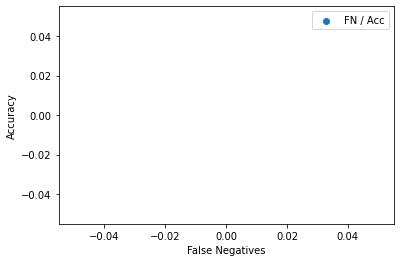

In [0]:
plt.figure()
plt.scatter( list( map(map_aux2,best_of_each) ), list( map(map_aux3,best_of_each) ), label="FN / Acc")
plt.ylabel("Accuracy")
plt.xlabel("False Negatives")
plt.legend()
plt.show()

### ANN

#### Decisão de Valores para os HiperParametros

Epoch 1/500
6/6 - 0s - loss: 0.7339 - accuracy: 0.4625 - val_loss: 0.7151 - val_accuracy: 0.4750
Epoch 2/500
6/6 - 0s - loss: 0.7192 - accuracy: 0.4597 - val_loss: 0.7016 - val_accuracy: 0.4708
Epoch 3/500
6/6 - 0s - loss: 0.7064 - accuracy: 0.4597 - val_loss: 0.6894 - val_accuracy: 0.4708
Epoch 4/500
6/6 - 0s - loss: 0.6943 - accuracy: 0.4597 - val_loss: 0.6782 - val_accuracy: 0.4750
Epoch 5/500
6/6 - 0s - loss: 0.6840 - accuracy: 0.4667 - val_loss: 0.6679 - val_accuracy: 0.5167
Epoch 6/500
6/6 - 0s - loss: 0.6762 - accuracy: 0.5431 - val_loss: 0.6582 - val_accuracy: 0.7083
Epoch 7/500
6/6 - 0s - loss: 0.6676 - accuracy: 0.6708 - val_loss: 0.6493 - val_accuracy: 0.7333
Epoch 8/500
6/6 - 0s - loss: 0.6568 - accuracy: 0.7014 - val_loss: 0.6409 - val_accuracy: 0.7667
Epoch 9/500
6/6 - 0s - loss: 0.6489 - accuracy: 0.7319 - val_loss: 0.6331 - val_accuracy: 0.8083
Epoch 10/500
6/6 - 0s - loss: 0.6413 - accuracy: 0.7347 - val_loss: 0.6259 - val_accuracy: 0.8208
Epoch 11/500
6/6 - 0s - loss:

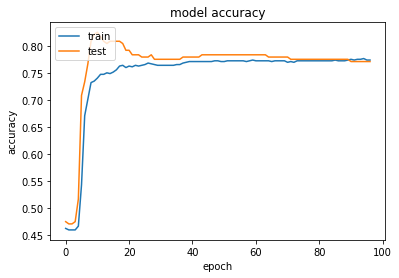

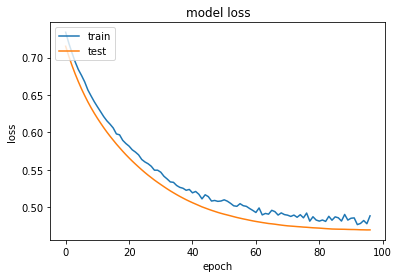

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

model2 = Sequential()
model2.add(Dense(64, input_dim=4, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)                   # compile the keras model
model2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

X_train, X_test, y_train, y_test = train_test_split(data_x_normalized, data_y, test_size=0.25, random_state=15)
history = model2.fit(X_train, y_train, epochs=500, verbose=2, batch_size=128, validation_data=(X_test, y_test), callbacks=[es])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Criação dos Modelos

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import optimizers

def create_model(options : Individual, dropout=0, lr=0):
  model = Sequential()
  model.add(Dense(options.n_nodes, input_dim=4, activation=options.activation_function))
  if dropout > 0:
    model.add(Dropout(dropout))
  for i in range(options.n_layers):
    model.add(Dense(options.n_nodes, activation=options.activation_function))
    if dropout > 0:
      model.add(Dropout(dropout))
  model.add(Dense(1, activation='sigmoid'))

  if options.optimizer == "adam":
    if lr == 0:
      lr = 0.001
    optimizer = optimizers.Adam(learning_rate = lr)
  elif options.optimizer == "rmsprop":
    if lr == 0:
      lr = 0.001
    optimizer = optimizers.RMSprop(learning_rate = lr)
  elif options.optimizer == "sgd":
    if lr == 0:
      lr = 0.01
    optimizer = optimizers.SGD(learning_rate = lr, momentum = 0.9)
  elif options.optimizer == 'adagrad':
    if lr == 0:
      lr = 0.01
    optimizer = optimizers.Adagrad(learning_rate = lr)
  elif options.optimizer == 'adadelta':
    if lr == 0:
      lr = 1.0
    optimizer = optimizers.Adadelta(learning_rate = lr)

  # compile the keras model
  model.compile(loss=options.loss, optimizer=optimizer, metrics=['accuracy'])

  return model

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping


THRESHOLD = 0.5

def run_neural_network(individual : Individual): # It lacks the classification threshold, but that should be decided in the end, depending on the FP and FN
  model = create_model(individual)

  history = model.fit(X_train, y_train, epochs=50, 
            verbose=0, batch_size=individual.n_batch_size, 
            validation_data=(X_test,y_test)) 
 
  y_pred=model.predict(X_test)
  y_pred_final = [1 if n >= THRESHOLD else 0 for n in y_pred]

  _, fp, fn, _ = confusion_matrix(y_test, y_pred_final).ravel()
  #fps.append()
  #fns.append()
  #scores.append(accuracy * 100)

  f1 = (fp / len(y_test)) * 100
  f2 = (fn / len(y_test)) * 100
  f3 = history.history['val_accuracy'][-1] * 100
  return f1, f2, f3

In [0]:
data_x = data.drop(['Severity'], axis=1).to_numpy()
print(data_x)
data_y = data['Severity'].to_numpy()
print(data_y)
feature_names = np.array(data.drop(['Severity'], axis=1).columns)
print(feature_names)

[[43.  1.  1.  5.]
 [58.  4.  5.  3.]
 [28.  1.  1.  3.]
 ...
 [64.  4.  5.  3.]
 [66.  4.  5.  3.]
 [62.  3.  3.  3.]]
[1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1
 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1
 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1
 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1
 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0
 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1
 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1
 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0
 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_x_normalized = scaler.fit_transform(data_x)
print(data_x_normalized)

[[-0.85923776 -1.39435297 -1.16481213  2.86326996]
 [ 0.15502765  0.93631247  1.2194515  -0.1131666 ]
 [-1.87350316 -1.39435297 -1.16481213 -0.1131666 ]
 ...
 [ 0.56073381  0.93631247  1.2194515  -0.1131666 ]
 [ 0.6959692   0.93631247  1.2194515  -0.1131666 ]
 [ 0.42549843  0.15942399  0.02731969 -0.1131666 ]]


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x_normalized, data_y, test_size=0.25, random_state=15)

In [0]:
def n_total_neurons(ns, alpha = 2):
  n_total_neurons = ns / (alpha * 5)
  return n_total_neurons

## Cálculo e Teste das Soluções Ótimas

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Generation  0 !
--- Individual  0
- Fitness  52.25000139077505
--- Individual  1
- Fitness  53.66666694482167
--- Individual  2
- Fitness  51.12499805291494
--- Individual  3
- Fitness  53.04166750113169
--- Individual  4
- Fitness  51.041664719581604
--- Individual  5
- Fitness  51.875001668930054
--- Individual  6
- Fitness  50.66666499773662
--- Individual  7
- Fitness  51.08333138624827
--- Individual  8
- Fitness  52.125001668930054
--- Individual  9
- Fitness  50.79166499773662
--- Individual  10
- Fitness  55.74999888737996
--- Individual  11
- Fitness  50.33333194255829
--- Individual  12
- Fitness  52.41666805744171
--- Individual  13
- Fitness  52.83333416779835
--- Individual  14
- Fitness  50.66666499773662
Mutated!
Mutated!
Mutated!
Mutated!
Generation  1 !
--- Individual  15
- Fitness  54.041666666666664
--- Individual  16
- Fitness  54.20833333333332
--- Individual  17
- Fitness  52.95833416779835
--- Individual  18
- Fitness  51.83333500226338
--- Individual  19
- Fitne

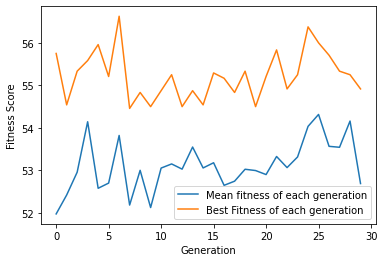

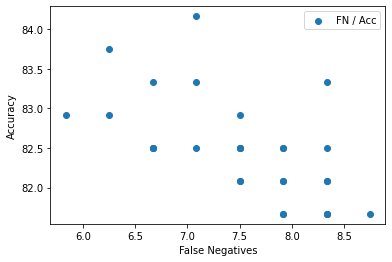

In [0]:
run_otimization()

In [0]:
def test_solution(i,threshold=THRESHOLD, dropout=0, lr=0):
  #K-Cross Validation
  accuracys = []
  fps = []
  fns = []

  kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=15)

  for train,test in kfold.split(data_x_normalized,data_y):
    model3 = create_model(i, dropout, lr)
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)# compile the keras model
    history = model3.fit(data_x_normalized[train], data_y[train], epochs=450, 
                          verbose=0, batch_size=500, validation_data=(data_x_normalized[test], data_y[test]), callbacks=[es])

    y_pred=model3.predict(data_x_normalized[test])
    y_pred_final = [1 if n >= threshold else 0 for n in y_pred]
    #print(y_pred_final)
    #print(data_y[test])

    _, fp, fn, _ = confusion_matrix(data_y[test], y_pred_final).ravel()

    fps.append((fp / len(test)) * 100)
    fns.append((fn / len(test)) * 100)
    accuracys.append(history.history['val_accuracy'][-1] * 100)

    # summarize history for accuracy
    #plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    #plt.title('model accuracy')
    #plt.ylabel('accuracy')
    #plt.xlabel('epoch')
    #plt.legend(['train', 'test'], loc='upper left')
    #plt.show()
    # summarize history for loss
    #plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    #plt.title('model loss')
    #plt.ylabel('loss')
    #plt.xlabel('epoch')
    #plt.legend(['train', 'test'], loc='upper left')
    #plt.show()

  print("Results:")
  print("ACC: ", np.mean(accuracys))
  print("FPS: ", np.mean(fps))
  print("FNS: ", np.mean(fns))

In [0]:
def optimize_learning_rate(ind, iterations=10, threshold=THRESHOLD):
  dropout = [0.1, 0.2, 0.5]
  lr = [1,0.1,0.01,0.001,0.0001]

  results = {}
  for i in range(iterations):
    print("Iteration: ",i)
    drop = random.choice(dropout)
    learn_rate = random.choice(lr)

    accuracys = []
    fps = []
    fns = []


    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=15)

    for train,test in kfold.split(data_x_normalized,data_y):
      model3 = create_model(ind, drop, learn_rate)
      es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)# compile the keras model
      history = model3.fit(data_x_normalized[train], data_y[train], epochs=450, 
                            verbose=0, batch_size=500, validation_data=(data_x_normalized[test], data_y[test]), callbacks=[es])

      y_pred=model3.predict(data_x_normalized[test])
      y_pred_final = [1 if n >= threshold else 0 for n in y_pred]
      #print(y_pred_final)
      #print(data_y[test])

      _, fp, fn, _ = confusion_matrix(data_y[test], y_pred_final).ravel()

      fps.append((fp / len(test)) * 100)
      fns.append((fn / len(test)) * 100)
      accuracys.append(history.history['val_accuracy'][-1] * 100)

      # summarize history for accuracy
      #plt.plot(history.history['accuracy'])
      #plt.plot(history.history['val_accuracy'])
      #plt.title('model accuracy')
      #plt.ylabel('accuracy')
      #plt.xlabel('epoch')
      #plt.legend(['train', 'test'], loc='upper left')
      #plt.show()
      # summarize history for loss
      #plt.plot(history.history['loss'])
      #plt.plot(history.history['val_loss'])
      #plt.title('model loss')
      #plt.ylabel('loss')
      #plt.xlabel('epoch')
      #plt.legend(['train', 'test'], loc='upper left')
      #plt.show()
      #print("Results:")
    
    results[i] = {
        "dropout": drop,
        "learning_rate": learn_rate,
        "acc": np.mean(accuracys),
        "fps": np.mean(fps),
        "fns": np.mean(fns)
    }

  print(results)

In [0]:
ttt1 = Individual(4,64,32,'tanh',20,'rmsprop','binary_crossentropy')
#optimize_learning_rate(ttt1)
ttt2 = Individual(4,64,64,'tanh',20,'rmsprop','binary_crossentropy')
#optimize_learning_rate(ttt2)
ttt3 = Individual(4,64,64,'tanh',20,'adam','binary_crossentropy')
#optimize_learning_rate(ttt3)

In [0]:
ttt1 = Individual(4,64,32,'tanh',20,'rmsprop','binary_crossentropy')
test_solution(ttt1,0.45,0.5,0.01)
ttt2 = Individual(4,64,64,'tanh',20,'rmsprop','binary_crossentropy')
test_solution(ttt2,0.45,0.2,0.0001)
ttt3 = Individual(4,64,64,'tanh',20,'adam','binary_crossentropy')
test_solution(ttt3,0.45,0.2,0.001)

In [0]:
ttt4 = Individual(7,16,32,'elu',20,'adam','binary_crossentropy')
optimize_learning_rate(ttt4)

Iteration:  0
Epoch 00072: early stopping
Epoch 00103: early stopping
Epoch 00151: early stopping
Epoch 00101: early stopping
Epoch 00054: early stopping
Iteration:  1
Epoch 00069: early stopping
Epoch 00113: early stopping
Epoch 00105: early stopping
Epoch 00129: early stopping
Epoch 00066: early stopping
Iteration:  2
Epoch 00076: early stopping
Epoch 00066: early stopping
Epoch 00162: early stopping
Epoch 00080: early stopping
Epoch 00105: early stopping
Iteration:  3
Epoch 00072: early stopping
Epoch 00081: early stopping
Epoch 00170: early stopping
Epoch 00135: early stopping
Epoch 00081: early stopping
Iteration:  4
Epoch 00052: early stopping
Epoch 00051: early stopping
Epoch 00051: early stopping
Epoch 00058: early stopping
Iteration:  5
Epoch 00115: early stopping
Epoch 00074: early stopping
Epoch 00067: early stopping
Epoch 00058: early stopping
Epoch 00131: early stopping
Iteration:  6
Epoch 00168: early stopping
Epoch 00076: early stopping
Epoch 00071: early stopping
Epoch 

In [0]:
test_solution(ttt4,0.45,0.2,0.0001)

Epoch 00107: early stopping
Epoch 00395: early stopping
Epoch 00316: early stopping
Epoch 00433: early stopping
Results:
ACC:  77.60416746139526
FPS:  14.0625
FNS:  8.020833333333332
